In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [65]:
model = keras.models.load_model('../output/NER_model.h5')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding (Embedding)       (None, 50, 50)            468000    
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 50, 200)          120800    
 l)                                                              
                                                                 
 time_distributed (TimeDistr  (None, 50, 8)            1608      
 ibuted)                                                         
                                                                 
Total params: 590,408
Trainable params: 590,408
Non-trainable

In [20]:
# word and tag 2 index
# max_len = 50
# word2idx = {w: i for i, w in enumerate(words)}
# tag2idx = {t: i for i, t in enumerate(tags)}


# Sentence to predict
sentence = 'EXW QTY: 192 UNITS CONCENTRATE 7-UP, AS PER BENEFICIARY\'S SALES QUOTATION NO. 790005454 DATED 02.01.2020'


# Apply pre-processing steps from before
def replace_dots(x):
    return x.replace(':',' ')

def replace_comma(x):
    return x.replace(',','')

sentence = replace_dots(replace_comma(sentence))



words = sentence.split()

import pickle
# Save the embeddings
with open("words_embeddings", "rb") as fp: 
    word2idx = pickle.load(fp)


# Embedding
X = []
for word in words:
    X.append(word2idx[word])
X

max_len = 50 # taken from ner_nn.ipynb
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(maxlen=max_len, sequences=[X], padding="post", value=len(word2idx)-1)

# Apply the predict function
output = model.predict(X)

2022-08-22 16:37:17.876984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [136]:
with open("tags_embeddings", "rb") as fp: 
    tag2idx = pickle.load(fp)
tag2idx = list(tag2idx)
tag2idx

predicted_output = []
for word in output[0]:
    print(word.argmax())
    predicted_output.append(tag2idx[word.argmax()])

4
4
4
0
4
0
0
0
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


In [138]:
df = pd.read_csv('../data/dataset_from_json.csv')

In [160]:
list(df[df['sentence #'] == 0]['words'])

['CPT',
 'LAHORE',
 'AIRPORT',
 'PAKISTAN',
 'QTY',
 '1',
 'PC',
 'OF',
 'MULTI',
 'MODE',
 'READER/TRINOCULAR',
 'MICROSCOPE',
 'SYSTEM',
 'MODEL']

In [ ]:
['CPT,....,ENDPAD, ENDPAD,ENDPAD,ENDPAD,ENDPAD']

In [152]:
words = list(df[df['sentence #'] == 0]['words'])
X = []
for word in words:
    X.append(word2idx[word])

max_len = 50 # taken from ner_nn.ipynb
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(maxlen=max_len, sequences=[X], padding="post", value=len(word2idx)-1)
X.shape

(1, 50)

In [153]:
_y = model.predict(X)
_y.shape

(1, 50, 8)

In [168]:
for prediction in _y[0]:
    # print(len(prediction))
    print(np.argmax(prediction))

0
3
4
4
4
4
0
0
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


In [154]:
for tag in df[df['sentence #'] == 0]['tag']:
    print(tag2idx.index(tag), tag)

0 Incoterms
0 Incoterms
0 Incoterms
0 Incoterms
6 O
1 Quantity
1 Quantity
6 O
3 GoodsDescription
3 GoodsDescription
3 GoodsDescription
3 GoodsDescription
3 GoodsDescription
6 O


In [169]:
y_pred = []
for word in _y[0]:
    y_pred.append(tag2idx[word.argmax()])

y = list(df[df['sentence #'] == 0]['tag'])
for i in range(len(y_pred)-len(y)):
    y.append('O')


for i, val in enumerate(zip(y, y_pred)):
    if i < 10:
        print('Actual', val, 'Predicted')

Actual ('Incoterms', 'Incoterms') Predicted
Actual ('Incoterms', 'GoodsDescription') Predicted
Actual ('Incoterms', 'UnitPriceAmount') Predicted
Actual ('Incoterms', 'UnitPriceAmount') Predicted
Actual ('O', 'UnitPriceAmount') Predicted
Actual ('Quantity', 'UnitPriceAmount') Predicted
Actual ('Quantity', 'Incoterms') Predicted
Actual ('O', 'Incoterms') Predicted
Actual ('GoodsDescription', 'UnitPriceAmount') Predicted
Actual ('GoodsDescription', 'UnitPriceAmount') Predicted


<Figure size 1080x1080 with 0 Axes>

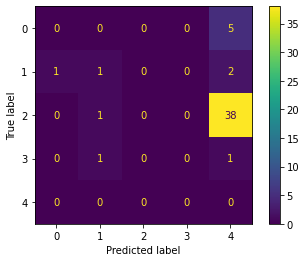

In [156]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
conf_matrix = ConfusionMatrixDisplay(confusion_matrix(y, y_pred))
conf_matrix.plot()
plt.show()

In [158]:
for i, v in enumerate(tag2idx):
    print(i, v)

0 Incoterms
1 Quantity
2 Tolerance
3 GoodsDescription
4 UnitPriceAmount
5 GoodsOrigin
6 O
7 HSCode
